In [1]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot

Using Theano backend.


In [2]:
from keras import backend as K
import numpy as np
from IPython.display import SVG

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.style.use("ggplot")
np.random.seed(13)

In [3]:
batch_size = 80
nb_classes = 3
nb_epoch = 4
nb_filter = 10

In [4]:
# input image dimensions
img_rows, img_cols = 80, 80
# the CIFAR10 images are RGB
img_channels = 3

In [5]:
import sys,os
sys.path.append(os.path.dirname(os.path.abspath('.')) + '/python')

In [6]:
import read_image

In [7]:
datasets, labels = read_image.read()

In [8]:
datasets.shape

(32, 19200)

In [9]:
labels.shape

(32, 1)

In [10]:
np.random.shuffle(datasets)
np.random.shuffle(labels)

In [11]:
X_train = datasets[:16].reshape(16, 3, 80, 80)
X_test = datasets[17:].reshape(15, 3, 80, 80)

In [12]:
y_train = labels[:16]
y_test = labels[17:]

In [13]:
X_train = X_train.astype('float32') # floatに変換
X_test = X_test.astype('float32')

In [14]:
X_train /= 255 # 0 ~ 1の範囲で学習させるため
X_test /= 255

In [15]:
y_train

array([[2],
       [1],
       [1],
       [2],
       [2],
       [0],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2]])

In [16]:
Y_train = np_utils.to_categorical(y_train, nb_classes) # データのラベルをone-hot表現に変換
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [17]:
model = Sequential()
model.add(Convolution2D(nb_filter, 3, 3, input_shape=(img_channels, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filter, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [18]:
res = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, validation_data=(X_test, Y_test))

Train on 16 samples, validate on 15 samples
Epoch 1/4
16/16 [==============================] - 0s - loss: 1.0698 - acc: 0.4375 - val_loss: 0.7530 - val_acc: 0.4667
Epoch 2/4
16/16 [==============================] - 0s - loss: 0.8165 - acc: 0.4375 - val_loss: 1.8295 - val_acc: 0.5333
Epoch 3/4
16/16 [==============================] - 0s - loss: 2.3777 - acc: 0.5625 - val_loss: 1.9007 - val_acc: 0.4667
Epoch 4/4
16/16 [==============================] - 0s - loss: 1.7471 - acc: 0.3750 - val_loss: 1.1700 - val_acc: 0.5333


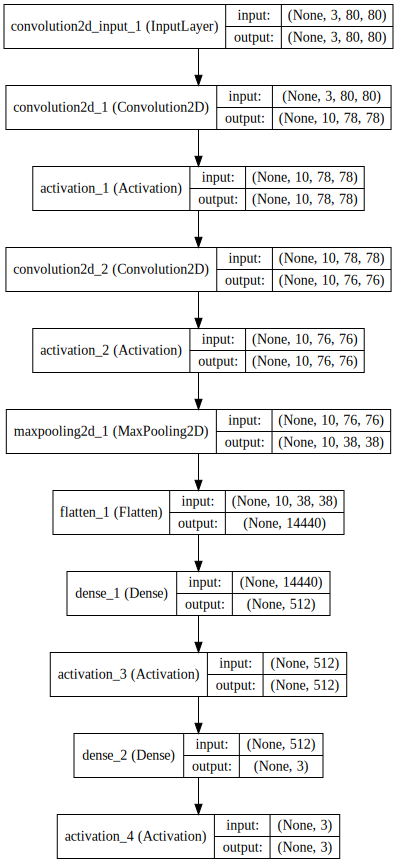

In [19]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


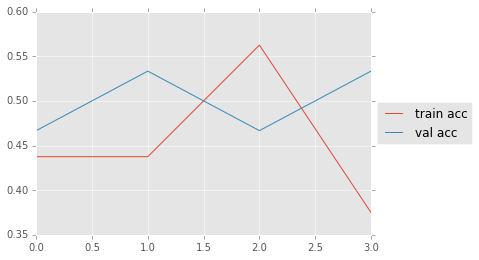

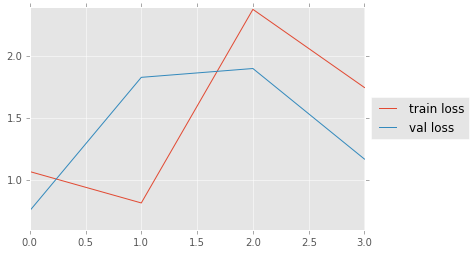

In [20]:
x = range(nb_epoch)
plt.plot(x, res.history['acc'], label="train acc")
plt.plot(x, res.history['val_acc'], label="val acc")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, res.history['loss'], label="train loss")
plt.plot(x, res.history['val_loss'], label="val loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [21]:
def draw_digit(data, row, col, n):
    size = data.shape[0]
    plt.subplot(row, col, n)    
    plt.imshow(data)

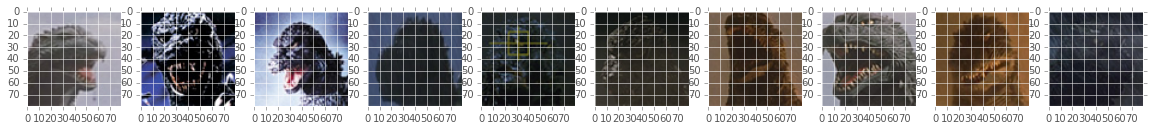

In [23]:
show_size = 10
plt.figure(figsize=(20,20))
for i in range(show_size):
    draw_digit(X_train[i].reshape(3, 80, 80).transpose(1, 2, 0), 1, show_size, i+1)
plt.show()

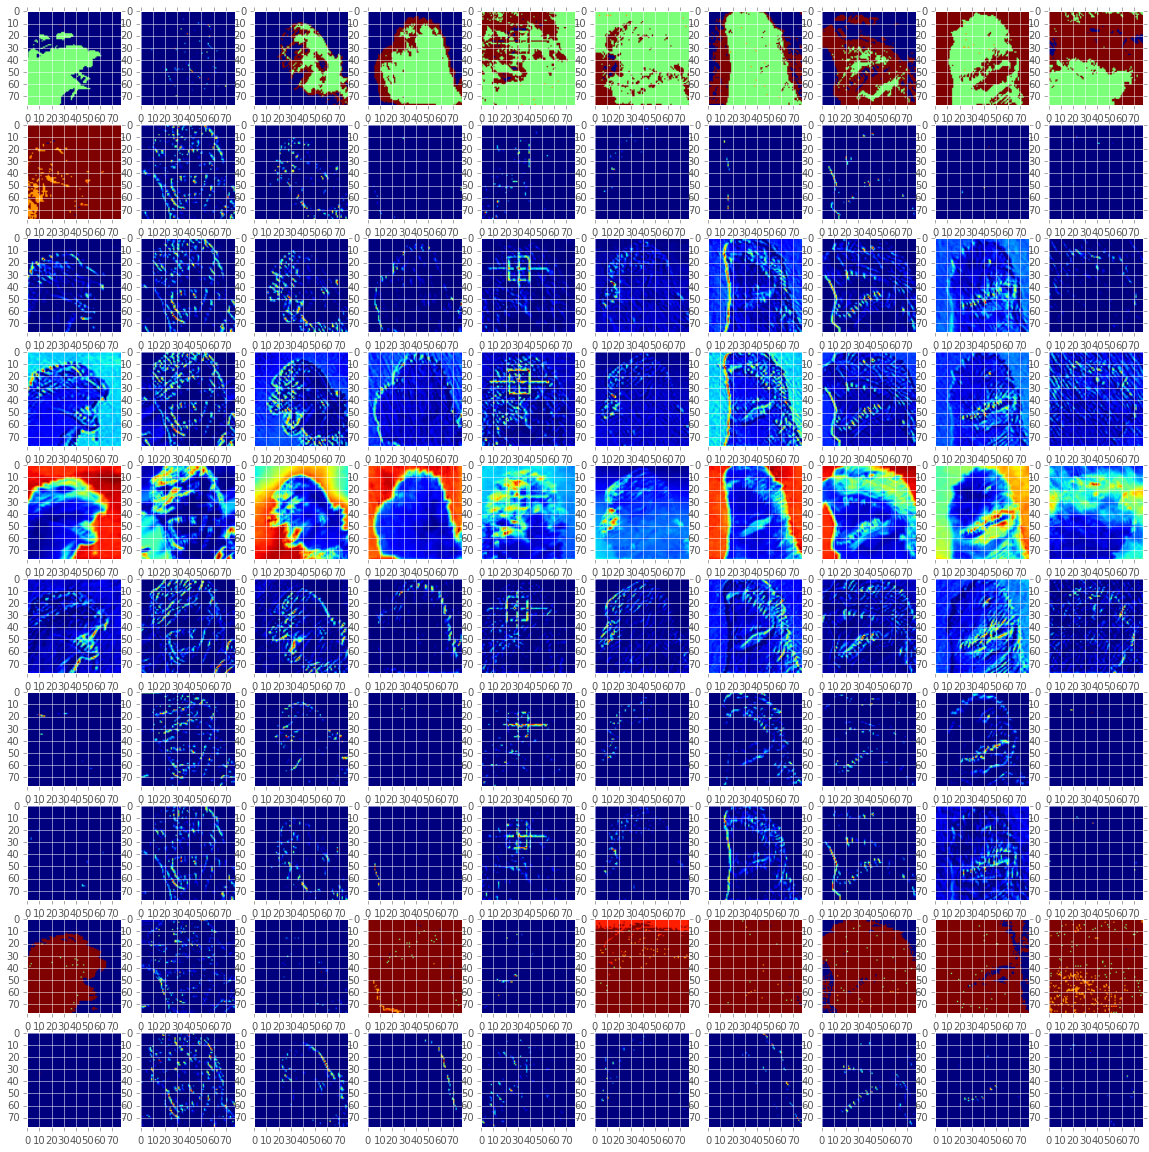

In [24]:
layer_output = K.function([model.layers[0].input],
                          [model.layers[1].output])
layers = layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        draw_digit(mat, nb_filter, show_size, pos)
plt.show()

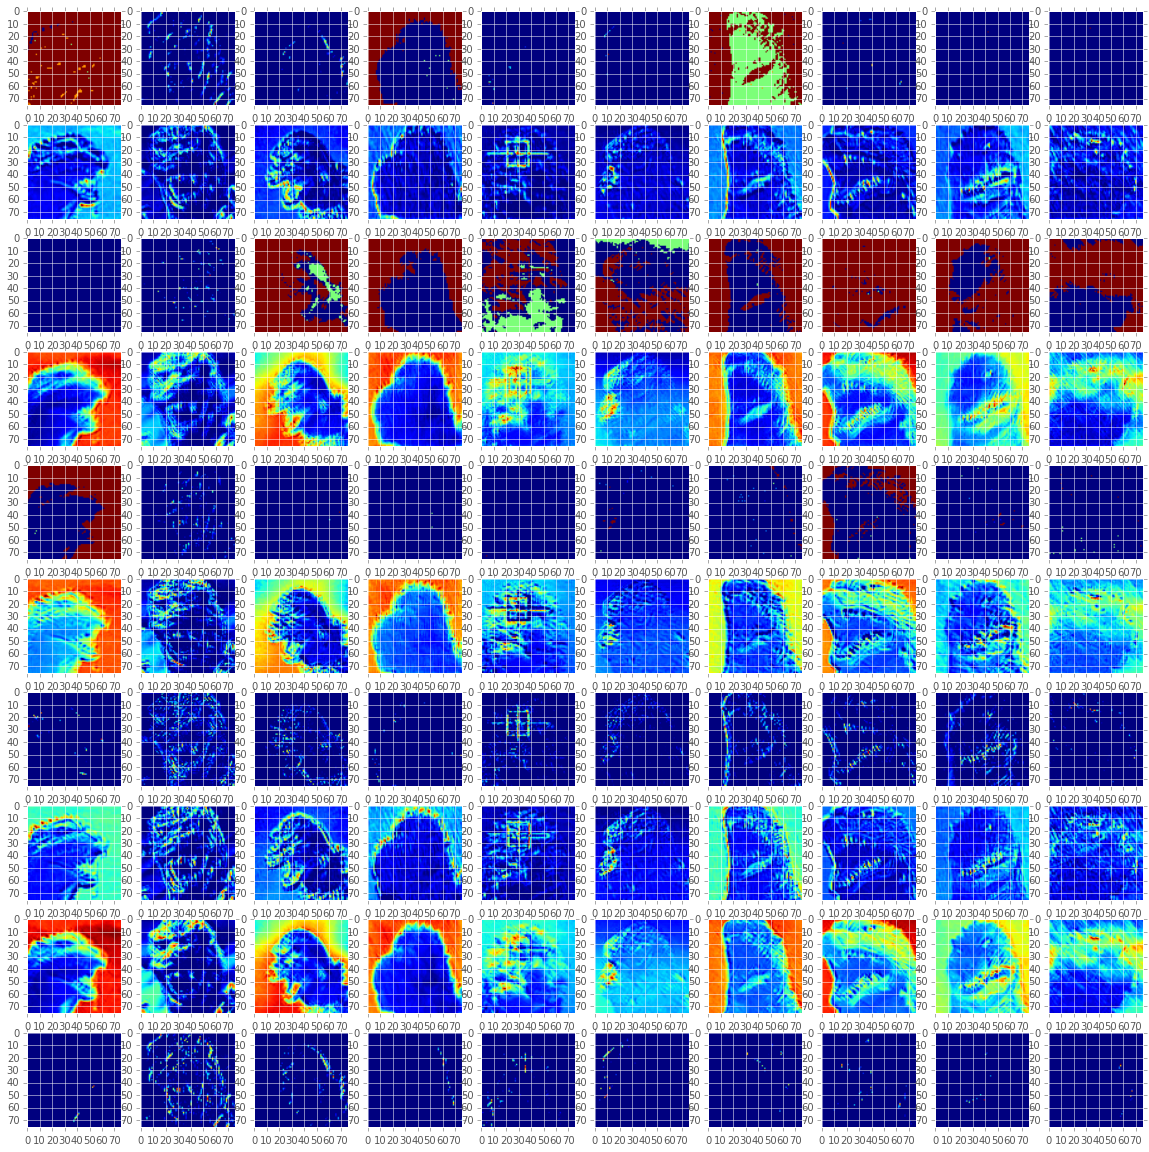

In [25]:
layer_output = K.function([model.layers[0].input],
                          [model.layers[3].output])
layers = layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        draw_digit(mat, nb_filter, show_size, pos)
plt.show()

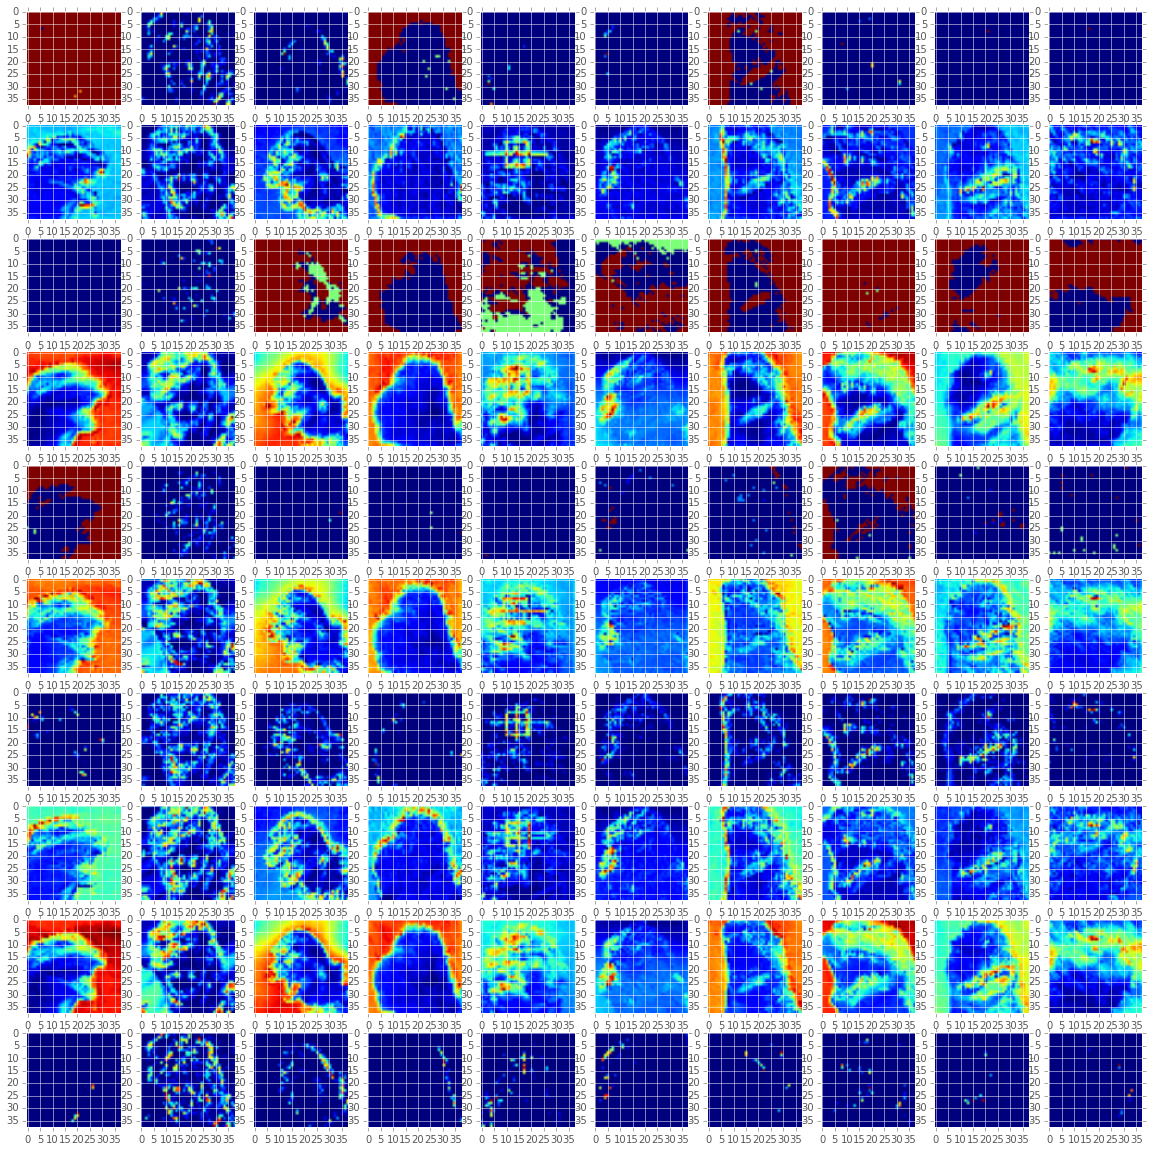

In [26]:
layer_output = K.function([model.layers[0].input],
                          [model.layers[4].output])
layers = layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        mat_size = mat.shape[1]
        draw_digit(mat, nb_filter, show_size, pos)
plt.show()